Top 3 Cuisines:
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64

Percentage of Restaurants for Each of the Top 3 Cuisines:
Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Name: count, dtype: float64

City with the Highest Number of Restaurants: New Delhi

Average Rating for Restaurants in Each City:
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
stanbul            4.292857
Name: Aggregate rating, Length: 141, dtype: float64

City with the Highest Average Rating: Inner City


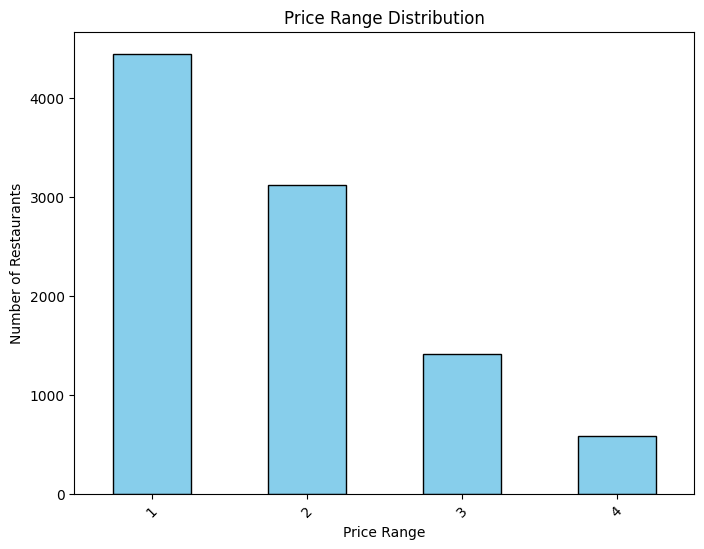


Percentage of Restaurants in Each Price Range:
Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64
['No' 'Yes']

Percentage of Restaurants that Offer Online Delivery: 25.662234321013504 %

Average rating for restaurants with online delivery: 3.2488372093023257
Average rating for restaurants without online delivery: 2.465295774647887


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
import re

restaurant_df=pd.read_csv('Dataset.csv')

def refined_data(sentence):
    sentence=unicodedata.normalize('NFKD',sentence)
    sentence=sentence.encode('ascii','ignore').decode('ascii')

    sentence=re.sub(r'[^a-zA-Z0-9\s]',' ',sentence)
    return sentence

restaurant_df['City'] = restaurant_df['City'].apply(lambda x: refined_data(str(x)))
restaurant_df['Restaurant Name'] = restaurant_df['Restaurant Name'].apply(lambda x: refined_data(str(x)))


restaurant_df = restaurant_df[restaurant_df['City'].str.strip().notna() & restaurant_df['Restaurant Name'].str.strip().notna()]

cuisines = restaurant_df['Cuisines'].str.split(',').explode().str.strip()
top_cuisines = cuisines.value_counts().head(3)
print("Top 3 Cuisines:")
print(top_cuisines)

num_restaurants = len(restaurant_df)
top_cuisines_percentage = (top_cuisines / num_restaurants) * 100
print("\nPercentage of Restaurants for Each of the Top 3 Cuisines:")
print(top_cuisines_percentage)

num_city = restaurant_df['City'].value_counts()
city_maxrestaurants = num_city.idxmax()
print("\nCity with the Highest Number of Restaurants:", city_maxrestaurants)

city_rating =restaurant_df.groupby('City')['Aggregate rating'].mean()
print("\nAverage Rating for Restaurants in Each City:")
print(city_rating)

city_maxrating = city_rating.idxmax()
print("\nCity with the Highest Average Rating:", city_maxrating)

price_range_num= restaurant_df['Price range'].value_counts()
price_range_num.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 6))
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()



price_range_percentage = (price_range_num / num_restaurants) * 100
print("\nPercentage of Restaurants in Each Price Range:")
print(price_range_percentage)


print(restaurant_df['Has Online delivery'].unique())

restaurant_df['Has Online delivery'] = restaurant_df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

online_delivery_percentage = restaurant_df['Has Online delivery'].mean() * 100
print("\nPercentage of Restaurants that Offer Online Delivery:", online_delivery_percentage, "%")

rating_with_delivery = restaurant_df[restaurant_df['Has Online delivery'] == 1]['Aggregate rating'].mean()
rating_without_delivery = restaurant_df[restaurant_df['Has Online delivery'] == 0]['Aggregate rating'].mean()

print("\nAverage rating for restaurants with online delivery:", rating_with_delivery)
print("Average rating for restaurants without online delivery:", rating_without_delivery)